<a href="https://colab.research.google.com/github/nureeee/Machhine-Learning/blob/main/210607_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9D%84_%EC%9C%84%ED%95%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9Dipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GIGO(Garbage In Garbage Out)
* 머신러닝에서 제일 중요한 요소중 하나는 깨끗한 데이터를 사용 하는 것
* 똑같은 데이터세트를 사용하더라도, 데이터의 전처리나, 분석 방법 등에 따라서 성능이 굉장히 많이 차이 난다.

캐리포니아 주택가격 데이터세트 가져오기

In [194]:
import os
import tarfile
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing") # 디렉토리 설정 - 기본 경로/dataset/housing
HOUSING_URL  = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" # 다운로드 할 파일의 url
def fetch_housing_data(housing_url= HOUSING_URL, housing_path= HOUSING_PATH):
  os.makedirs(housing_path, exist_ok= True) # 디렉토리 만들기
  tgz_path = os.path.join(housing_path, "housing.tgz") # 파일의 경로
  urllib.request.urlretrieve(housing_url, tgz_path) # url로 지정한 파일을 다운로드
  housing_tgz = tarfile.open(tgz_path) # 다운 받은 파일 열기
  housing_tgz.extractall(path= housing_path) # 압축파일(housing.tgz) 압축 풀기
  housing_tgz.close() # 파일 닫기
fetch_housing_data()

In [195]:
# 다운받은 데이터셋(csv) 파일을  판다스 데이터 프레임으로 만들기
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH, filename='housing.csv'):
    csv_path = os.path.join(housing_path, filename) #(폴더, 파일이름)
    return pd.read_csv(csv_path) # 데이터 프레임 리턴

데이터 세트 확인하기

In [196]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# housing 데이터 알아보기
각 컬럼의 의미를 살펴보기

* longitude : 경도
* latitude : 위도
* housing_median_age : 중간 주택 연도
* total_rooms : 방의 총 개수
* total_bedrooms : 침실의 총 개수
* population : 인구
* households : 가구
* median_income : 중간 소득
* median_house_value : 중간 주택 가격
* ocean_proximity : 바다와의 거리


# 데이터 프레임의 기본 정보 확인
- **info()**를 활용해서 원하는 데이터의 형식으로 존재하는지 확인할 것

In [197]:
housing.info() ##bedroom의 NaN값을 처리해야 된다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# 데이터프레임의 통계적인 특성 확인해 보기
- 수치데이터가 대부분이기 때문에 Describe로 통계의 특성도 알아보기

In [198]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# 데이터의 형태를 빠르게 검토하기 _ 시각화

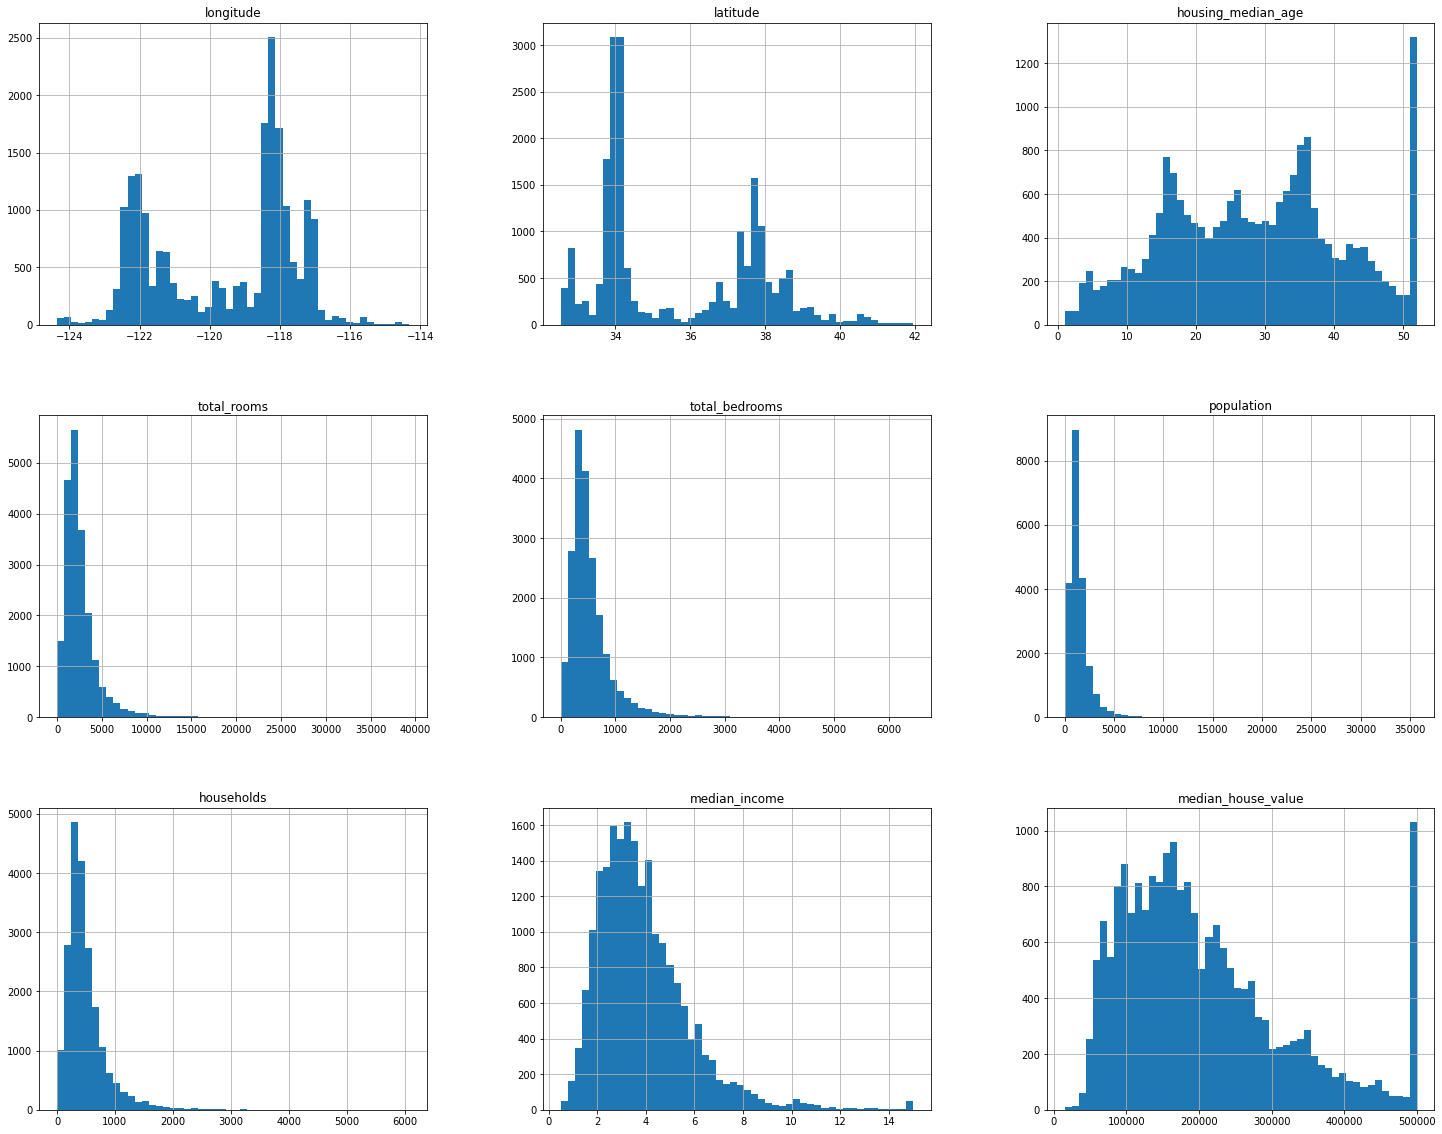

In [199]:
import matplotlib.pyplot as plt
housing.hist(bins=50 , figsize=(25, 20)) # bins는 기준은 없지만 30, 40, 50을 주로 사용
plt.show()

데이터세트 만들기

# 데스트 세트 만들기
* 전체 데이터 세트를 활용해서 훈련하는 바람에 사용자의 새로운 데이테에 대한 예측이 잘 안되는 현상이 **데이터 스누핑 현황**을 방지
* 테스트 세트를 따로 만들어서 훈련 세트로 알고리즘을 훈련 후에 테스트 세트의 오차를 **일반화 오차**

## 데이터 쪼개기(split)
* 훈련 세트와 데스트 세트의 비율은 8:2 또는 7.5:2.5로 설정

* 테스트 세트를 생성할 때는 전체 데이터를 한번 섞고(shuffle) 잘라야(split)한다

In [200]:
# 무작위로 데이터 선택하기
import numpy as np
np.random.permutation(100) # 0~99까지으이 정수 100개를 랜덤하게 생성

array([32, 93, 57, 31, 26, 33, 30, 42, 76, 90, 97, 48, 54, 52, 49, 19, 29,
        0, 21, 89, 70, 20, 43, 44, 23, 27, 66,  3, 84, 92, 12, 88, 15, 10,
       51, 81, 61, 62, 87, 74, 22, 13, 55,  2,  4, 16, 64,  7, 47, 78,  6,
       35, 77, 79, 24, 85, 59, 96,  5, 99, 75, 80,  8, 46, 63, 45, 86, 53,
       60, 34, 65, 37,  9, 95, 94, 18, 69, 67, 68, 28, 39, 56, 25, 82, 83,
       71, 11, 58, 40, 38, 73, 91, 98, 14, 72, 41, 50,  1, 36, 17])

In [201]:
# data: 잘라낼 데이터 전체
# test_ratio : 데스트 데이터의 비율
def split_train_test(data, test_ratio=0.2):
    #데이터 개수 만큼 무작위 인덱스를 가진 리스트 생성
    shuffled_indices = np.random.permutation(len(data))

    # 데스트 세트의 크기 구하기
    test_set_size = int(len(data) * test_ratio)

    # 데스트 세트의 인덱스 구하기
    test_indices = shuffled_indices[: test_set_size]

    # 훈련 세트의 인덱스
    train_indices = shuffled_indices[test_set_size : ]

    return data.iloc[train_indices], data.iloc[test_indices]


In [202]:
df_train, df_test = split_train_test(housing)
print(f"훈련 세트의 길이 : {len(df_train)} / 데스트 세트의 길이 : {len(df_test)}")

훈련 세트의 길이 : 16512 / 데스트 세트의 길이 : 4128


훈련 세트로 훈련을 하고, 테스트 세트로 테스트를 진행
* **테스트 세트는** 런칭 직전까지 **한번도 사용되어선 안된다.**

문제점
* 랜덤을 무한하게 돌리면 언젠가는 머신러닝 알고리즘이 모든 데이터를 다 사용

해결책
* 난수 발생 초깃값 (랜덤 시드)을 고정 - `np.random.seed(42)`
* 각 샘플(행) 마다의 해시값을 구하여 20%보다 작거나 같은 샘플만 테스트 세트로 보낸다.

1. `np.random.seed`를 사용했을 때의 장/단점
* 장점 : 항상 같은 random이 발생되어서 안정적임. 데이터의 변경 없이 모델 알고리즘만 변경하면 좋다.
* 단점 : 데이터 세트에 추가 / 삭제 등의 변경이 일어나면 다시 섞여버린다.


**해시값**을 사용한 방법
- 해시값: 어떠한 데이터의 고유값

In [203]:
from zlib import crc32
def test_set_check(identifier, test_ratio=0.2):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32


`test_set_check`의 결과물 : `True / False`가 등장
* `True` : Test Set로 들어가야 할 데이터
* `False` : Train Set로 들어가야 할 데이터

In [204]:
test_set_check(2)

True

In [205]:
# hash 값을 기준으로 자르기
# data : 전체 데이터
# test_ratio : 데스트 세트 비율
# id_columns : id로 삼을 컬럼의 이름
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]

    # 데스트 세트로 포함될 위치 구하기
    in_test_set = ids.apply( lambda id_ : test_set_check(id_, test_ratio)  )
    return data.loc[~in_test_set], data.loc[in_test_set] # True와 False를 반전시킴

housing 데이터세트에는 식별자(id)로 사용할 수 있는게 **행의 인덱스**밖에 없다. 식별자 값으로 행의 index를 사용하면 제약 사항이 있습니다.

* 새로운 데이터의 추가는 반드시 행의 끝에서만 일어날 것
* 어떠한 행도 삭제되면 안된다.

위 두가지 제약사람 때문에 아까 랜덤으로 했을 때랑 별 다른 이점이 없다..

**고유 식별자**로 선정해햐할 데이터
housing 데이터 세트에는 바뀌지 않을 위도,경도를 사용하자

In [206]:
# 행의 인덱스를 이용해 데이터 세트를 나누는 경우 : 제약사항이 있다
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [207]:
# 몇백년 간은 바뀌지 않을 위도와 경도를 사용해서 데이터를 나눠보기

housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']

train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')

잘 되어 있는거 쓰는게 낫겠지

In [208]:
# 머신러닝 과학자들이 잘 만들어 놨어요. 알고리즘, 데이터 등등에 관하여...
# sklearn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) #random_state 매개변수를 이용해 랜덤 고정


`train_test_split`은 기본적으로 Shuffle - Split 지원

# 샘플링 편향과 계층적 샘플링


In [209]:
housing['income_cat'] = pd.cut(
    housing['median_income'], # 계층을 구할 데이터
    bins =[0.0, 1.5, 3.0, 4.0, 6.0, np.inf], # 구간(계층)
    labels=[1, 2, 3, 4, 5]
)

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


각 구간별로 계층적 샘플링 수행

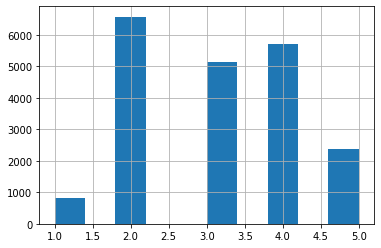

In [210]:
# 계층 별 데이터의 빈도 확인
housing['income_cat'].hist()
plt.show()

사이킷런의 StratifiedShuffleSplit을 활용하여 섞기+계층별 스플릿까지

In [211]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_shuff_split = StratifiedShuffleSplit(
    n_splits=1,
    test_size=0.2,
    random_state=42
)
# split에서 쪼개지게 되면 train / test 데이터의 인덱스가 등장
for train_index, test_index in strat_shuff_split.split(housing, housing['income_cat']):
    strat_train_set =housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [212]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)


2    0.318798
4    0.277374
3    0.249516
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

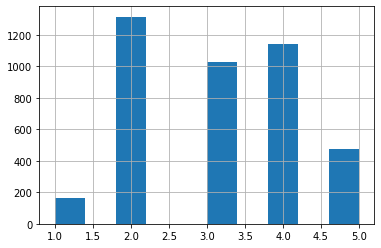

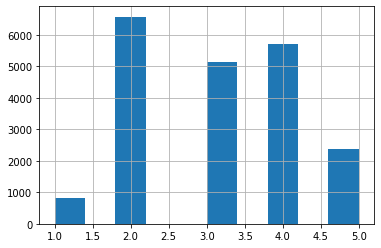

In [213]:
strat_test_set['income_cat'].hist()
plt.figure()
housing['income_cat'].hist()
plt.show()

In [214]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "전체": income_cat_proportions(housing),
    "계층 샘플링": income_cat_proportions(strat_test_set),
    "무작위 샘플링": income_cat_proportions(test_set),
}).sort_index()
compare_props["무작위 샘플링 오류율"] = 100 * compare_props["무작위 샘플링"] / compare_props["전체"] - 100
compare_props["계층 샘플링 오류율"] = 100 * compare_props["계층 샘플링"] / compare_props["전체"] - 100
compare_props

,전체,계층 샘플링,무작위 샘플링,무작위 샘플링 오류율,계층 샘플링 오류율
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.249516,0.249516,0.256783,2.912621,0.000000
4,0.277374,0.277374,0.269138,-2.969432,0.000000
5,0.114438,0.114583,0.109496,-4.318374,0.127011


필요없는 데이터 삭제

'income_cat'은 계층적 분할용으로 추가된 컬럼, 역할을 다 했으면 삭제가 되도 무관


In [215]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True) # inplace :데이터 프레임의 변경을 허용(set_자체를 바꿈)

In [216]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11372,-117.96,33.68,26.0,1374.0,234.0,731.0,244.0,6.0905,224800.0,<1H OCEAN
18622,-122.02,37.09,35.0,1818.0,368.0,682.0,254.0,4.8611,240000.0,NEAR OCEAN
13067,-121.28,38.53,18.0,224.0,38.0,95.0,41.0,3.1042,165000.0,INLAND
9868,-121.84,36.60,30.0,2958.0,691.0,1616.0,666.0,3.4643,191800.0,<1H OCEAN
19341,-122.87,38.62,52.0,1514.0,348.0,767.0,354.0,2.1903,160000.0,<1H OCEAN


# 탐색과 시각화

In [217]:
# 원본 데이터 백업
housing = strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11372,-117.96,33.68,26.0,1374.0,234.0,731.0,244.0,6.0905,224800.0,<1H OCEAN
18622,-122.02,37.09,35.0,1818.0,368.0,682.0,254.0,4.8611,240000.0,NEAR OCEAN
13067,-121.28,38.53,18.0,224.0,38.0,95.0,41.0,3.1042,165000.0,INLAND
9868,-121.84,36.60,30.0,2958.0,691.0,1616.0,666.0,3.4643,191800.0,<1H OCEAN
19341,-122.87,38.62,52.0,1514.0,348.0,767.0,354.0,2.1903,160000.0,<1H OCEAN


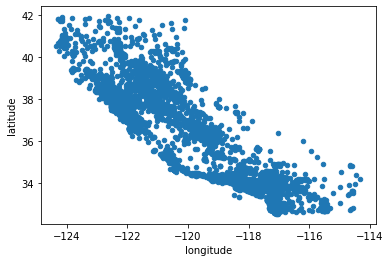

In [218]:
housing.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

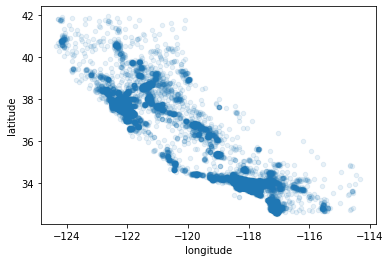

In [219]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=.1)
plt.show()

색상으로 주택 가격, 원의 크기로 인구수

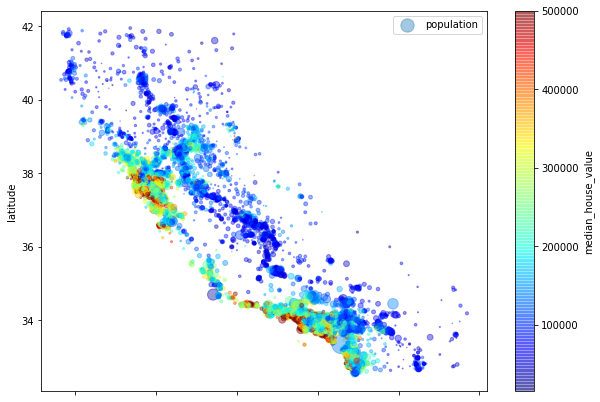

In [220]:
housing.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    alpha=0.4,
    s=housing['population'] / 100, #인구수 데이터를 이용한 점 크기 설정
    label='population', # 점의 이륾
    c= 'median_house_value', # 컬러의 농도를 표현할 컬럼
    cmap=plt.get_cmap('jet'), # 팔레트
    colorbar=True, # 그래프 왼쪽에 색상 설명
    figsize=(10, 7)

)

무작정 해안강 위치 한다고 집값이 비싼건 아니다.
** 어떤 데이터가 집 가격에 영향을 미칠 것인가 확인** --> 상관관계 분석

# 상관관계 조사하기 (scc - standard correlation cofficience)
- 표준 상관계수 조사
- 피어슨 상관계수 (피어슨 r)


In [221]:
# corr()
corr_matrix = housing.corr()

# 중간 주택 가격에 대한 다른 특성들과의 상관계수 구하기
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688948
total_rooms           0.136778
housing_median_age    0.107670
households            0.067449
total_bedrooms        0.050463
population           -0.020880
longitude            -0.048235
latitude             -0.142089
Name: median_house_value, dtype: float64

상관관계의 범위는 항상 '-1 ~ 1'
* 1에 가까우면 양의 상관관계(부호가 양수인 경우)
  - x가 증가하면 y가 증가한다.
  - median_income이 증가하면 median_house_value가 증가한다
* -1에 가까우면 음의 상관관계 (부호가 음수인 경우)
  - x가 증가하면 y가 감소한다
  - population이 증가하면 median_house_value가 감소한다

* 상관관계 절댓값이 0 ~ 0.3 : 거의 연관이 없는 관계
* 상관관계 절댓값이 0.3 ~ 0.7 : 보통의 상관관계
* 상관관계 절댓값이 0.7 이상 : 강력한 상관관계





  

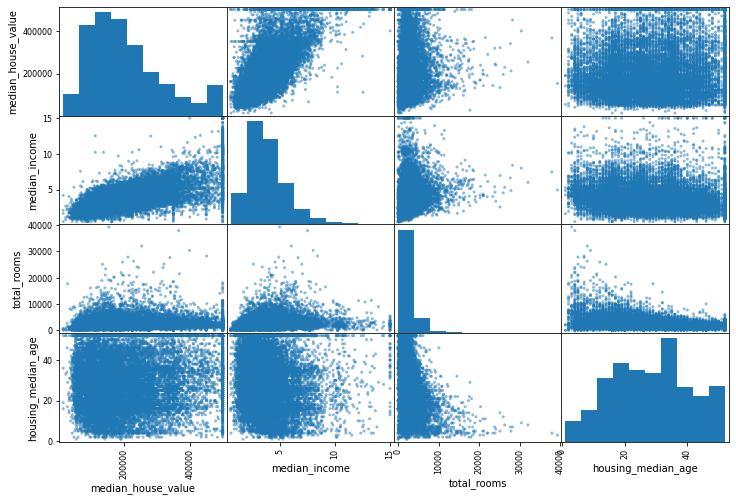

In [222]:
from pandas.plotting import scatter_matrix
feature_names = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[feature_names], figsize=(12, 8))
plt.show()

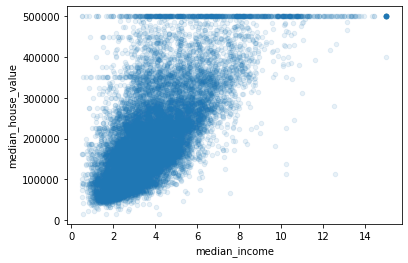

In [223]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.show()
# 500000만의 데이터를 삭제하는 것이 좋지만 데이터의 양이 적기 때문에 ...사용

# 특성 조합
두개 이상의 특성을 조합해서 새로운 특성 만들기
* 비율 구하기 (나누기'/')
* 관계 설정하기 (곱하기'*')
* 다항식 만들기 등등.....


In [224]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households'] # 가구당 방의 수
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms'] # 총 방수 별 침실 비율
housing['population_per_household'] = housing['population'] / housing['households'] # 가구당 인구 비율

In [225]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688948
rooms_per_household         0.147223
total_rooms                 0.136778
housing_median_age          0.107670
households                  0.067449
total_bedrooms              0.050463
population                 -0.020880
population_per_household   -0.021521
longitude                  -0.048235
latitude                   -0.142089
bedrooms_per_room          -0.266315
Name: median_house_value, dtype: float64

# 머신러닝을 위한 데이터 준비
* 데이터에 대한 각종 전처리를 할 수 있는 **파이프라인**생성


In [226]:
# feature와 label의 분리
label_name = 'median_house_value'

housing_labels = strat_train_set[label_name].copy()

housing = strat_train_set.drop(label_name, axis=1)

In [227]:
housing_labels.head()

11372    224800.0
18622    240000.0
13067    165000.0
9868     191800.0
19341    160000.0
Name: median_house_value, dtype: float64

In [228]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
11372,-117.96,33.68,26.0,1374.0,234.0,731.0,244.0,6.0905,<1H OCEAN
18622,-122.02,37.09,35.0,1818.0,368.0,682.0,254.0,4.8611,NEAR OCEAN
13067,-121.28,38.53,18.0,224.0,38.0,95.0,41.0,3.1042,INLAND
9868,-121.84,36.60,30.0,2958.0,691.0,1616.0,666.0,3.4643,<1H OCEAN
19341,-122.87,38.62,52.0,1514.0,348.0,767.0,354.0,2.1903,<1H OCEAN


# feature의 정제
* 'total_bedrooms'에 있는 NaN값을 처리
- 어떤 값으로 체우기
- 아예 컬럼을 삭제 (NaN값이 너무 많은 경우)
- 해당 샘플만 제거 (행 제거)

    - NaN값 데이터를 예측하기 위한 모델을 따로 생성할 수도 있음!!!!!

In [229]:
# 사이킷 런의 simpleImputer는 누락값을 채우게 해주는 클래스
from sklearn.impute import SimpleImputer # 누락값을 처리해줌

# 누락값을 채우기 위한 전략(방법)이 필요
imputer = SimpleImputer(strategy='median') # 중간값으로 누락값을 채우는 SimpleImputer 생성


In [230]:
# 문장열 데이터에는 중간값이라는 개념이 없기 때문에 ocean_proximity는 일단 빼자
housing_num = housing.drop('ocean_proximity', axis=1)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
11372,-117.96,33.68,26.0,1374.0,234.0,731.0,244.0,6.0905
18622,-122.02,37.09,35.0,1818.0,368.0,682.0,254.0,4.8611
13067,-121.28,38.53,18.0,224.0,38.0,95.0,41.0,3.1042
9868,-121.84,36.60,30.0,2958.0,691.0,1616.0,666.0,3.4643
19341,-122.87,38.62,52.0,1514.0,348.0,767.0,354.0,2.1903


In [231]:
# imputer에 수치 데이터만 있는 housing_num을 입력(적용)
imputer.fit(housing_num)


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [232]:
# statistics_변수에 각 컬럼별 중간 값이 들어있음
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2120.5    ,  432.     ,
       1164.5    ,  409.     ,    3.54035])

우리한테 필요한건 `total_bedrooms` 뿐이지만 전체의 중간값을 미연에 구해놓는이 것이 좋다.
* 나중에 추가될 데이터에 뭐가 NaN으로 들어올지 모르니까...

In [233]:
housing_num.median().values

array([-118.5    ,   34.26   ,   29.     , 2120.5    ,  432.     ,
       1164.5    ,  409.     ,    3.54035])

# 학습된 Imputer를 사용해서 훈련 세트에서 누락된 값을 중간값으로 채울 수 있다.


In [234]:
# numpy 배열로 나온다 
X = imputer.transform(housing_num) # housing_num의 누락값 채우기

In [235]:
#x = imputer.fit_transform(housing_num) # housing_num 데이터를 입력하고, housing_num을 변환했다
#fit() -> transform()

In [236]:
housing_tr = pd.DataFrame(
    X,
    columns=housing_num.columns,
    index= housing_num.index # 원본의 인덱스
)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 11372 to 19783
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


# 텍스트, 범주형(Categorical) 특성 다루기
* 항목 형태의 데이터
 - 숫자형 항목 (eg) 소득구간)
 - 덱스트 형태로 되어있는 항목
* 머신러닝에는 텍스트현 의 데이터는 입력이 절대 불가능
 - 텍스트를 숫자로 만들어주는 과정이 필요
 - Encoding 이라고함
* 문자열 형태의 데이터인 ocean_proximity를 숫자형식으로 바꿔줘야한다 


In [237]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
11372,<1H OCEAN
18622,NEAR OCEAN
13067,INLAND
9868,<1H OCEAN
19341,<1H OCEAN


ocean_proximity에 어떤 항목이 있는지 검사

In [238]:
housing_cat['ocean_proximity'].unique()

array(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [239]:
# OrdinalEncoder 활용하기
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat.values) # 입력과 변환을 동시에

## 위와 똑같은 코드
# ordinal_encoder.fit(housing_cat)
# housing_cat_encoded = ordinal_encoder.transform(housing_cat.values)

housing_cat_encoded[:10]

array([[0.],
       [4.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [3.],
       [1.]])

In [240]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

위 처럼 인코딩 했을 때 머신러닝 알고리즘은 다음과 같이 생각합니다.
- 0과 1번은 비슷하다
-inland + inland = island 라고 생각함--> 1+1 =2
- 0번과 4번은 멀리 위치해서 다른 데이터라고 생각

카테고리를 각각 표현하기 위한 특성이 추가가 되어야 한다. : **더미 특성(dummy)**이라고 한다.

위와 같이 여러 범주 중 하나만 표현하고(강조) 나머지는 강조하지 않는 인코딩 : **ONE HOT ENCODING**이라고 한다. 



In [241]:
# 사이킷 런의 onehotEncoder 사용하기
from sklearn.preprocessing import OneHotEncoder
cat_encoder =  OneHotEncoder()

housing_cat_one_hot = cat_encoder.fit_transform(housing_cat)
housing_cat_one_hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

sparse : 희소 데이터?? 0과 1만 있는 행렬???? 
1은 하나이고 나머지는 0

In [242]:
# toarray() 함수를 이용해 2차원 매트릭스로 확인 가능
housing_cat_one_hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [243]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [244]:
housing_cat_one_hot_df = pd.DataFrame(
    housing_cat_one_hot.toarray(),
    columns = cat_encoder.categories_,
    index = housing_cat.index
)

housing_cat_one_hot_df.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11372,1.0,0.0,0.0,0.0,0.0
18622,0.0,0.0,0.0,0.0,1.0
13067,0.0,1.0,0.0,0.0,0.0
9868,1.0,0.0,0.0,0.0,0.0
19341,1.0,0.0,0.0,0.0,0.0


# 변환기(Transformer) 사용자 정의
* 비즈니스를 위한 변환
* 사이킷런과 연동되는 사용자 정의 변환기

* 사이킷런의 'BaseEstimator' 클래스 상속
  - 추후에 만들 파이프라인에 등록시킬 수 있게 해줌
* 사이킷런의 'TransformerMixin'클래스 상속
  - fit_tranform() 자동구현
  

fit(), transform() 은??

## Duck Typing 문법
- 메소드의 구현에 의해서 클래스의 정체성이 결정되는 것
 - fit(), transform() 메소드를 정의함에 따라서 Transformer 클래스로 인식하게 하는 것


In [245]:
class A:
  def foo(self):
    print("Here is A")

class B:
  def foo(self):
    print("Here is B")

class C:
  def goo(self):
    print("Here is C")

def who_are_you(who):
  who.foo()

In [246]:
# a, b, c는 서로 다른 클래스로 만들어진 다른 객체
# 새끼 오리들
a = A()
b = B()
c = C()

# who_are_you : 엄마 오리
who_are_you(a) # 실행 OK
who_are_you(b) # 실행 OK
#who_are_you(c) # 실행 FAILtra

Here is A
Here is B


# 변환기(Transfermer) 만들기


In [247]:
from sklearn.base import BaseEstimator, TransformerMixin 

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

#생성자; 클래스를 객체롤 만들 대 처음으로 가지고 있는 값??
#원본 데이터에 특성조합 데이터 추가
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):  #1.BaseEstimator, TransformerMixin 상속
    
    # 2. population_per_household 특성 조합을 해봤는데, 딱히 효과가 없는 것 같음
    # 선택에 다라서 (Boolean) 추가할 때 / 추가 하고 싶지 않을 때에 대한 설정을 할 것임
    def __init__(self, add_population_per_household=True):
        self.add_population_per_household = add_population_per_household

    # 3. fit 구현
    # fit은 아무일도 하지 않아도 형식만은 지켜야 duck typing문법이 적용 가능
    #   * transform에서 모든 일을 처리하는 변환기
    #   * fit_transform(데이터)
    # 보통 fit에서 하는 일 : transform을 하기 위한 데이터 준비과정
    #                        스케일링을 할 수도 있고, 데이터 조건 분기 (이런 것도 거의 하지 않음)
    #                        transform 또는 prediction의 옵션 설정(마치 생성자 처럼)
    def fit(self, X):
        return self # self를 넘기는 이유? transform 하기 위해서 fit(x).transform(x)

    # 4. transform 구현
    # 실제 데이터 변환을 구현
    def transform(self, X):
        rooms_per_household = X[ : , rooms_ix] / X[ : , households_ix]
        bedrooms_per_room = X[ : , bedrooms_ix] / X[ : , rooms_ix]

        if self.add_population_per_household: # 옵션에 의해 구현?
            population_per_household = X[ : , population_ix] / X[ : , households_ix]
            return np.c_[X, rooms_per_household, bedrooms_per_room, population_per_household]
        else:
            return np.c_[X, rooms_per_household, bedrooms_per_room]
                                                                 

In [248]:
attr_adder = CombinedAttributesAdder(add_population_per_household=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [249]:

housing_extra_attribs[:5]

array([[-117.96, 33.68, 26.0, 1374.0, 234.0, 731.0, 244.0, 6.0905,
        '<1H OCEAN', 5.631147540983607, 0.1703056768558952],
       [-122.02, 37.09, 35.0, 1818.0, 368.0, 682.0, 254.0, 4.8611,
        'NEAR OCEAN', 7.15748031496063, 0.20242024202420242],
       [-121.28, 38.53, 18.0, 224.0, 38.0, 95.0, 41.0, 3.1042, 'INLAND',
        5.463414634146342, 0.16964285714285715],
       [-121.84, 36.6, 30.0, 2958.0, 691.0, 1616.0, 666.0, 3.4643,
        '<1H OCEAN', 4.441441441441442, 0.23360378634212306],
       [-122.87, 38.62, 52.0, 1514.0, 348.0, 767.0, 354.0, 2.1903,
        '<1H OCEAN', 4.27683615819209, 0.22985468956406868]], dtype=object)

# 특성 스케일링

* Min=Max 스케일링
  - 데이터의 단위를 0 ~ 1사이로 맞춘다
  - 최솟값을 0, 최대값을 1로 놓고 그 사이의 값은 비율로 맞춰준다.
  -정규화(normalization)

* standard 스케일링
  - 평균값이 모든 데이터의에서 뺴주고 표준편차로 나눠준다.
  - 평균이 0이되고 분산이 1이된다
  - 데이터를 골고룰 펼쳐주는 역할을 해준다
     - outlier 처리에 강건?
  - 표준화 ( Generalization )
  

# 파이프라인 만들기

* 데이터 변환하는 과정은 매우 많고 **정확한 순서**대로 수행되어야 한다
* 사이킷 런에서는 **pipeline**클래스를 제공하여 전처리 및 예측의 순서를 항상 순차적으로 수행할 수 있도록 도와준다.

1. 누락값 채우기(simplelmputer)
2. 추가특성 생성
3.

In [250]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy='median')),
                         ('add_attr', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())
])

housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
11372,-117.96,33.68,26.0,1374.0,234.0,731.0,244.0,6.0905
18622,-122.02,37.09,35.0,1818.0,368.0,682.0,254.0,4.8611
13067,-121.28,38.53,18.0,224.0,38.0,95.0,41.0,3.1042
9868,-121.84,36.60,30.0,2958.0,691.0,1616.0,666.0,3.4643
19341,-122.87,38.62,52.0,1514.0,348.0,767.0,354.0,2.1903


In [251]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr[:5]

array([[ 0.80177766, -0.91111934, -0.20407777, -0.57783653, -0.72280939,
        -0.61622694, -0.66864151,  1.17627413,  0.07416509, -0.70118868,
        -0.00872219],
       [-1.22465326,  0.68271888,  0.51281872, -0.37506845, -0.40313648,
        -0.65965076, -0.64249146,  0.52527108,  0.66089025, -0.18030757,
        -0.0355548 ],
       [-0.85530378,  1.35577666, -0.84131909, -1.10302415, -1.19039066,
        -1.17985039, -1.19948752, -0.40505854,  0.00968825, -0.71193926,
        -0.06731643],
       [-1.13481149,  0.45369227,  0.11454289,  0.14555232,  0.36741837,
         0.1680604 ,  0.4348906 , -0.21437512, -0.38316015,  0.32547287,
        -0.05787742],
       [-1.64890603,  1.39784277,  1.86695652, -0.51390065, -0.45084885,
        -0.58432373, -0.38099096, -0.88899516, -0.44643473,  0.26466453,
        -0.08029902]])

In [253]:
from sklearn.compose import ColumnTransformer # 파이프라인을 합친다기 보다, 열(컬럼)

num_feature_name = list(housing_num.columns) # 수치형 데이터의 컬럼명 리스트
cat_feature_name = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_feature_name), 
    ('cat', OneHotEncoder(), cat_feature_name)
])

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
11372,-117.96,33.68,26.0,1374.0,234.0,731.0,244.0,6.0905,<1H OCEAN
18622,-122.02,37.09,35.0,1818.0,368.0,682.0,254.0,4.8611,NEAR OCEAN
13067,-121.28,38.53,18.0,224.0,38.0,95.0,41.0,3.1042,INLAND
9868,-121.84,36.60,30.0,2958.0,691.0,1616.0,666.0,3.4643,<1H OCEAN
19341,-122.87,38.62,52.0,1514.0,348.0,767.0,354.0,2.1903,<1H OCEAN


In [254]:
housing_final = full_pipeline.fit_transform(housing)
housing_final[:3]

array([[ 0.80177766, -0.91111934, -0.20407777, -0.57783653, -0.72280939,
        -0.61622694, -0.66864151,  1.17627413,  0.07416509, -0.70118868,
        -0.00872219,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.22465326,  0.68271888,  0.51281872, -0.37506845, -0.40313648,
        -0.65965076, -0.64249146,  0.52527108,  0.66089025, -0.18030757,
        -0.0355548 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.85530378,  1.35577666, -0.84131909, -1.10302415, -1.19039066,
        -1.17985039, -1.19948752, -0.40505854,  0.00968825, -0.71193926,
        -0.06731643,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ]])